In [62]:
#Importing the required libraries
import tensorflow as tf
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

# Preprocessing the images
path = glob.glob("/content/drive/MyDrive/Processed_Images/*.jpg")
train_data = []
for img in path:
    n = cv.imread(img)
    n = cv.resize(n, (200, 200))
    n = cv.cvtColor(n, cv.COLOR_BGR2GRAY)
    train_data.append(n)

# 0 -Weed
# 1 -Tomato
# 2 -Bottle
classes = ["Weed", "Tomato", "Bottle"]
train_labels = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2]

#Coverting the dataset to tensors
train_data = tf.constant(train_data)
train_labels = tf.constant(train_labels)

#Normalising the data to improve accuracy by getting values between 0 and 1
train_data_norm = train_data/255

#Set random seed
tf.random.set_seed(42)

#Create the model
multimod = tf.keras.Sequential([
    #Flatten then to reduce it to a single long vector
    tf.keras.layers.Flatten(input_shape=(200, 200)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

#Compile the model
multimod.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Fit the model
non_norm_history = multimod.fit(train_data_norm,
                                train_labels,
                                epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 640ms/step - loss: 1.0883 - accuracy: 0.2222
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 1.0303 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 0.8912 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 33ms/step - loss: 0.7694 - accuracy: 0.5556
Epoch 5/10
1/1 [==============================] - 0s 25ms/step - loss: 0.7208 - accuracy: 0.5556
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6634 - accuracy: 0.6111
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 0.5755 - accuracy: 0.7222
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 0.4959 - accuracy: 0.8333
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 0.4710 - accuracy: 0.7778
Epoch 10/10
1/1 [==============================] - 0s 20ms/step - loss: 0.4204 - accuracy: 0.8333


In [63]:
multimod.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 40000)             0         
                                                                 
 dense_66 (Dense)            (None, 4)                 160004    
                                                                 
 dense_67 (Dense)            (None, 4)                 20        
                                                                 
 dense_68 (Dense)            (None, 3)                 15        
                                                                 
Total params: 160,039
Trainable params: 160,039
Non-trainable params: 0
_________________________________________________________________


In [88]:
#Making the predictions of our model
Y_probs = multimod.predict(train_data_norm)
Y_probs

Y_preds = Y_probs.argmax(axis=1)
Y_preds

1/1 [==============================] - 0s 23ms/step


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [70]:
train_labels == Y_preds

<tf.Tensor: shape=(18,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False])>

In [109]:
#Showing the results of a prediction of a random picture in the dataset
import random
def random_result(images, Y_preds, test_labels, classes):
    i = random.randint(0, len(test_labels)-1)

    if Y_preds[i] == test_labels[i]:
      print("Prediction successful\n")
      print(classes[test_labels[i]])
    else:
      print("Prediction unsuccessful\n")
      print("Prediction was "+classes[Y_preds[i]]+" but it is "+classes[test_labels[i]])
    plt.imshow(images[i])

In [89]:
#Plotting our predictions in a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
#Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  #Subplotting each class and associating it with each other
  fig, ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set class labels
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set threshold for different colors
  threshold = (cm.max()+ cm.min())/2

  #Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

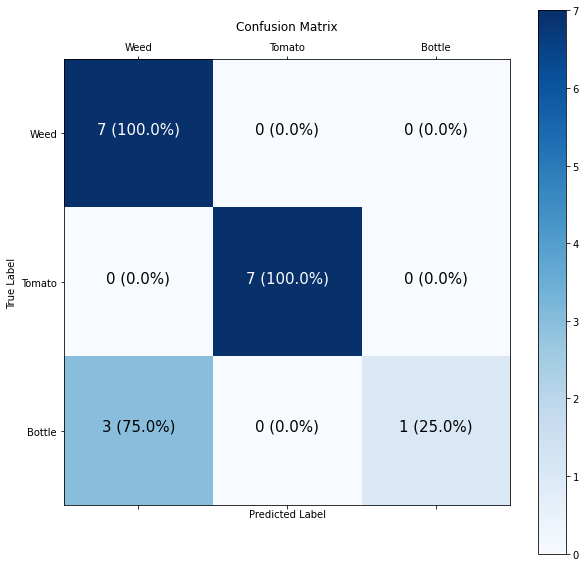

In [73]:
#Calling the confusion matrix model
make_confusion_matrix(y_true = train_labels,
                      y_pred = Y_preds,
                      classes = classes)

Prediction successful

Weed


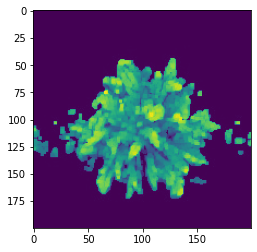

In [121]:
#Calling the random result function to visually see how good our model is
random_result(images=train_data_norm,
              Y_preds=Y_preds,
              test_labels=train_labels,
              classes=classes)